In [99]:
###Task5###
#对不同census_tract地域的犯罪量和犯罪种类，以及当地房价进行相关性的探究
#
import pandas as pd
crime_data=pd.read_csv("DC_crime.csv")
crime_data

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 21,8702.0,property,-77.003574,2017-04-29T08:00:23.000,theft f/auto,day,138139.0,5.0,5.0,...,150 - 299 block of q street ne,2017-04-29T01:30:14.000,17070672,theft f/auto,17070672-01,5E,2017-04-29T13:49:31.000Z,others,"38.911121322949178,-77.003576581965632",38.911114
1,cluster 16,1600.0,property,-77.026557,2017-04-29T08:30:37.000,theft f/auto,day,146051.0,4.0,4.0,...,7600 - 7699 block of georgia avenue nw,2017-04-29T02:30:10.000,17070675,theft f/auto,17070675-01,4A,2017-04-29T14:38:59.000Z,others,"38.982391883146363,-77.026559339798794",38.982384
2,cluster 8,4702.0,property,-77.020913,2017-04-29T11:10:57.000,theft/other,day,137185.0,1.0,6.0,...,600 - 699 block of k street nw,2017-04-29T10:43:33.000,17070714,theft/other,17070714-01,6E,2017-04-29T15:19:02.000Z,others,"38.902525540064957,-77.020915170313728",38.902518
3,cluster 31,7808.0,property,-76.919601,2017-04-28T09:30:33.000,theft/other,day,135903.0,6.0,7.0,...,5715 5739 block of blaine street ne,2017-04-28T09:15:27.000,17070736,theft/other,17070736-01,7C,2017-04-29T16:11:44.000Z,others,"38.890951021927407,-76.919603310082607",38.890943
4,cluster 39,10900.0,property,-77.003927,2017-04-29T13:42:11.000,theft/other,day,128340.0,7.0,8.0,...,4610 - 4659 block of south capitol street,2017-04-29T13:03:40.000,17070780,theft/other,17070780-01,8D,2017-04-29T18:17:15.000Z,others,"38.822847890448664,-77.003929146312586",38.822840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449198,cluster 22,11100.0,property,-76.977167,2021-03-17T20:20:07.000,theft/other,evening,139268.0,5.0,5.0,...,1815 - 1999 block of bryant street ne,2021-03-17T20:15:08.000,21034375,theft/other,21034375-01,5C,2021-03-17T21:07:30.000,others,"38.9212817635688,-76.9771673661107",38.921282
449199,cluster 6,5201.0,property,-77.035546,2021-03-17T17:20:33.000,motor vehicle theft,evening,137976.0,2.0,2.0,...,1500 - 1599 block of p street nw,2021-03-16T21:00:41.000,21034386,motor vehicle theft,21034386-01,2B,2021-03-17T21:38:51.000,others,"38.9096398205834,-77.0355462229667",38.909640
449200,cluster 23,8802.0,property,-76.982015,2021-03-17T23:09:20.000,theft/other,midnight,137150.0,5.0,5.0,...,900 - 999 block of bladensburg road ne,2021-03-17T22:21:45.000,21034407,theft/other,21034407-01,5D,2021-03-18T01:12:46.000,others,"38.9022029472732,-76.9820154636605",38.902203
449201,cluster 23,8802.0,property,-76.990857,2021-03-17T22:40:24.000,motor vehicle theft,midnight,137569.0,5.0,5.0,...,1300 - 1399 block of west virginia avenue ne,2021-03-17T22:38:11.000,21034425,motor vehicle theft,21034425-01,5D,2021-03-18T00:57:07.000,others,"38.905978473251,-76.9908573768314",38.905978


In [100]:
crime_data.isnull().sum()

NEIGHBORHOOD_CLUSTER      5502
CENSUS_TRACT              1192
offensegroup                 0
LONGITUDE                    0
END_DATE                 26796
offense-text                 0
SHIFT                        0
YBLOCK                       0
DISTRICT                   212
WARD                        11
YEAR                         0
offensekey                   0
BID                     374442
sector                     243
PSA                        243
ucr-rank                     0
BLOCK_GROUP               1192
VOTING_PRECINCT             68
XBLOCK                       0
BLOCK                        1
START_DATE                  14
CCN                          0
OFFENSE                      0
OCTO_RECORD_ID               0
ANC                          0
REPORT_DAT                   0
METHOD                       0
location                     0
LATITUDE                     0
dtype: int64

In [101]:
#删除缺失行过多的列
crime_data.drop(columns=['BID','START_DATE','END_DATE'],inplace=True)

In [102]:
crime_data['REPORT_DAT']

0         2017-04-29T13:49:31.000Z
1         2017-04-29T14:38:59.000Z
2         2017-04-29T15:19:02.000Z
3         2017-04-29T16:11:44.000Z
4         2017-04-29T18:17:15.000Z
                    ...           
449198     2021-03-17T21:07:30.000
449199     2021-03-17T21:38:51.000
449200     2021-03-18T01:12:46.000
449201     2021-03-18T00:57:07.000
449202     2021-03-25T14:41:36.000
Name: REPORT_DAT, Length: 449203, dtype: object

In [103]:
# REPORT_DAT转为datetime类型分成year列和month列，方便处理
crime_data['REPORT_DAT']=pd.to_datetime(crime_data['REPORT_DAT'],utc=True)
crime_data['year']=crime_data['REPORT_DAT'].dt.year
crime_data['month']=crime_data['REPORT_DAT'].dt.month

In [104]:
#去除REPORT_DAT列
crime_data.drop(columns=['REPORT_DAT'],inplace=True)

In [105]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449203 entries, 0 to 449202
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NEIGHBORHOOD_CLUSTER  443701 non-null  object 
 1   CENSUS_TRACT          448011 non-null  float64
 2   offensegroup          449203 non-null  object 
 3   LONGITUDE             449203 non-null  float64
 4   offense-text          449203 non-null  object 
 5   SHIFT                 449203 non-null  object 
 6   YBLOCK                449203 non-null  float64
 7   DISTRICT              448991 non-null  float64
 8   WARD                  449192 non-null  float64
 9   YEAR                  449203 non-null  int64  
 10  offensekey            449203 non-null  object 
 11  sector                448960 non-null  object 
 12  PSA                   448960 non-null  float64
 13  ucr-rank              449203 non-null  int64  
 14  BLOCK_GROUP           448011 non-null  object 
 15  

In [106]:
crime_data.dropna(subset=['CENSUS_TRACT','OFFENSE','offensegroup'],axis=0,inplace=True)


In [107]:
# 观察  不同的犯罪数量
num_case_ct=crime_data.groupby(['CENSUS_TRACT']).count()[['offensegroup']]
num_case_ct

,offensegroup
CENSUS_TRACT,
100.0,5338
201.0,545
202.0,6602
300.0,1734
400.0,721
...,...
10700.0,10602
10800.0,2939
10900.0,2508


In [108]:
raw_data=pd.read_csv("DC_properties.csv",index_col=0)

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [109]:
# 计算不同census _tract 的median 
median_price=pd.DataFrame(raw_data.groupby(['CENSUS_TRACT']).median()['PRICE'])

In [110]:
median_price

,PRICE
CENSUS_TRACT,
100.0,874500.0
202.0,841000.0
300.0,667000.0
400.0,911340.0
501.0,445350.0
...,...
10700.0,372000.0
10800.0,200000.0
10900.0,85000.0


In [111]:
#显示不同的地区的犯罪数量以及当地的房价
myData=num_case_ct.join(median_price,how='outer')
myData

,offensegroup,PRICE
CENSUS_TRACT,,
100.0,5338,874500.0
201.0,545,NaN
202.0,6602,841000.0
300.0,1734,667000.0
400.0,721,911340.0
...,...,...
10700.0,10602,372000.0
10800.0,2939,200000.0
10900.0,2508,85000.0


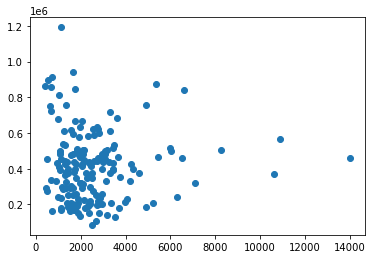

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
#将犯罪数量和房子价格可视化
plt.scatter(myData['offensegroup'],myData['PRICE'])
plt.show()

In [113]:
#协方差观察相关性
#犯罪数量和房子价格的相关性较低
myData.corr()

,offensegroup,PRICE
offensegroup,1.000000,0.010648
PRICE,0.010648,1.000000


In [114]:
#将犯罪类型为钱的property 划分出来
property_crime=crime_data[crime_data['offensegroup']=='property']

In [115]:
#为钱的犯罪数量生成出来为property_count
property_count=pd.DataFrame(property_crime.groupby(['CENSUS_TRACT']).count()[['offensegroup']])
property_count

,offensegroup
CENSUS_TRACT,
100.0,5055
201.0,517
202.0,6269
300.0,1640
400.0,696
...,...
10700.0,9801
10800.0,2740
10900.0,1911


In [136]:
#计算不同的犯罪类型和census_tract的相关性，
for i in ['theft/other','sex abuse','motor vehicle theft','arson','robbery','theft f/auto','homicide','burglary','assault w/dangerous weapon']:
    property_offense1=crime_data[(crime_data['OFFENSE']==i)]
    property_offense1=pd.DataFrame(property_offense1.groupby(['CENSUS_TRACT']).count()[['offensegroup']])
    #print(property_offense1)
    print(i)
    myData=property_offense1.join(median_price,how='outer')
    #print(myData)
    #plt.scatter(myData['offensegroup'],myData['PRICE'])
    #plt.show()
    print(myData.corr())
#  motor vehicle theft和 price 的负相关性较高，达到 -0.47
#homicide 和price 的负相关性较高，达到-0.598
#assault w/dangerous weapon也和price 的负相关性较高，达到-0.599

#所以可以得出结论 ：房子价格越高的地方，电瓶车被偷的数量减少。原因可能是房子价格越高的地方，小区越高档。高档小区人们开法拉利之类的汽车。
#电瓶车的数量减少，所以被偷的数量减少。
#而且房价越高的地方，自杀和枪杀的人越少。我们可以想象房价越高代表越有钱越幸福，烦恼越少，所以自杀和枪杀的人越少。

theft/other
              offensegroup     PRICE
offensegroup      1.000000  0.136704
PRICE             0.136704  1.000000
sex abuse
              offensegroup     PRICE
offensegroup      1.000000 -0.341238
PRICE            -0.341238  1.000000
motor vehicle theft
              offensegroup     PRICE
offensegroup      1.000000 -0.469769
PRICE            -0.469769  1.000000
arson
              offensegroup     PRICE
offensegroup      1.000000 -0.373643
PRICE            -0.373643  1.000000
robbery
              offensegroup     PRICE
offensegroup      1.000000 -0.333624
PRICE            -0.333624  1.000000
theft f/auto
              offensegroup     PRICE
offensegroup      1.000000  0.194804
PRICE             0.194804  1.000000
homicide
              offensegroup     PRICE
offensegroup      1.000000 -0.598939
PRICE            -0.598939  1.000000
burglary
              offensegroup     PRICE
offensegroup      1.000000 -0.295229
PRICE            -0.295229  1.000000
assault w/dangerous weapo

In [117]:
myData=property_count.join(median_price,how='outer')
myData

,offensegroup,PRICE
CENSUS_TRACT,,
100.0,5055,874500.0
201.0,517,NaN
202.0,6269,841000.0
300.0,1640,667000.0
400.0,696,911340.0
...,...,...
10700.0,9801,372000.0
10800.0,2740,200000.0
10900.0,1911,85000.0


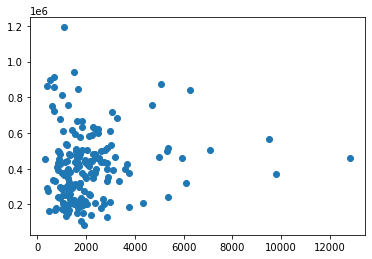

In [118]:
plt.scatter(myData['offensegroup'],myData['PRICE'])
plt.show()

In [119]:
myData.corr()

,offensegroup,PRICE
offensegroup,1.000000,0.098683
PRICE,0.098683,1.000000


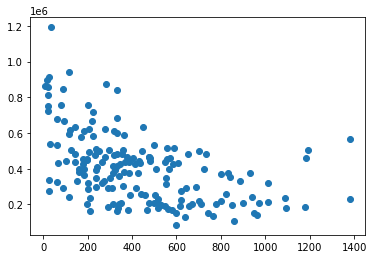

In [120]:
#观察 统计为violent的数据集根据census_tract进行分类和price的相关性
property_crime=crime_data[crime_data['offensegroup']=='violent']
property_count=pd.DataFrame(property_crime.groupby(['CENSUS_TRACT']).count()[['offensegroup']])
myData=property_count.join(median_price,how='outer')
plt.scatter(myData['offensegroup'],myData['PRICE'])
plt.show()

In [121]:
myData.corr()
#可以观察到 房价越高的地方，发生暴力性质的次数在减少。

,offensegroup,PRICE
offensegroup,1.000000,-0.489466
PRICE,-0.489466,1.000000


In [122]:
#根据时间聚合groupby
crime_by_time=crime_data[crime_data['year']<2021].groupby(['year','month']).count()[['offensegroup']]

In [123]:
crime_by_time

offensegroup
year month              
2008 1              2639
     2              2449
     3              2539
     4              2718
     5              3125
...                  ...
2020 8              2439
     9              2570
     10             2567
     11             2431
     12             2323

[156 rows x 1 columns]

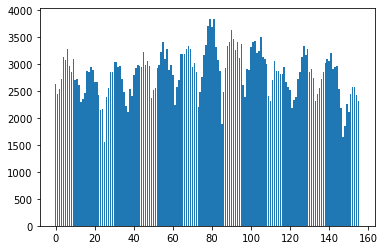

In [124]:
#将数据在不同年份不同月份可视化处理
plt.bar(range(len(crime_by_time['offensegroup'])),crime_by_time['offensegroup'])
plt.show()

In [125]:
#只针对property犯罪类型的数据在不同year，month 时的犯罪次数的计数
property_crime=crime_data[crime_data['offensegroup']=='property']
propertyCrime_by_time=property_crime.groupby(['year','month']).count()[['offensegroup']]

In [126]:
propertyCrime_by_time_new=property_crime.groupby(['year','month'],as_index=False).size()

In [127]:
propertyCrime_by_time_new

,year,month,size
0,2008,1,2071
1,2008,2,1979
2,2008,3,1975
3,2008,4,2076
4,2008,5,2446
...,...,...,...
155,2020,12,2035
156,2021,1,1771
157,2021,2,1487
158,2021,3,1669


In [128]:
propertyMoney_by_time_new=property_crime.groupby(['year','month'],as_index=False).size()

In [129]:
propertyCrime_by_time

offensegroup
year month              
2008 1              2071
     2              1979
     3              1975
     4              2076
     5              2446
...                  ...
2020 12             2035
2021 1              1771
     2              1487
     3              1669
     4                 2

[160 rows x 1 columns]

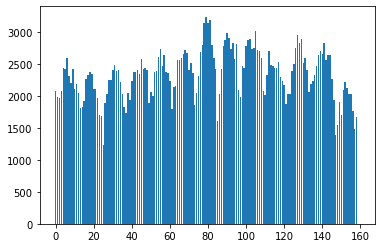

In [130]:
plt.bar(range(len(propertyCrime_by_time['offensegroup'])),propertyCrime_by_time['offensegroup'])
plt.show()

In [131]:
violent_crime=crime_data[crime_data['offensegroup']=='violent']
violentCrime_by_time=violent_crime.groupby(['year','month']).count()[['offensegroup']]
violentCrime_by_time

offensegroup
year month              
2008 1               568
     2               470
     3               564
     4               642
     5               679
...                  ...
2020 11              403
     12              288
2021 1               330
     2               269
     3               218

[159 rows x 1 columns]

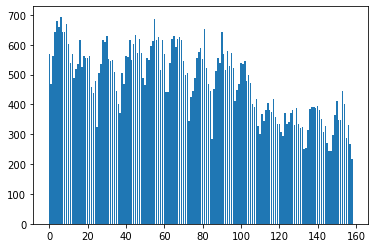

In [134]:
plt.bar(range(len(violentCrime_by_time['offensegroup'])),violentCrime_by_time['offensegroup'])
plt.show()

In [ ]:
#可能的改进：使用深度学习的RNN或是LSTM模型进行时间序列分析，对未来犯罪数量（尤其是可以看到明确下降趋势的violent类犯罪数量）进行预测

In [ ]:
#Task5的结论：
#房子价格越高的地方，电瓶车被偷的数量减少。原因可能是房子价格越高的地方，小区越高档。高档小区人们开法拉利之类的汽车。
#电瓶车的数量减少，所以被偷的数量减少。
#而且房价越高的地方，自杀和枪杀的人越少。我们可以想象房价越高代表越有钱越幸福，烦恼越少，所以自杀和枪杀的人越少。